[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/tmp/ipython-input-1-477287453.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='coolwarm')


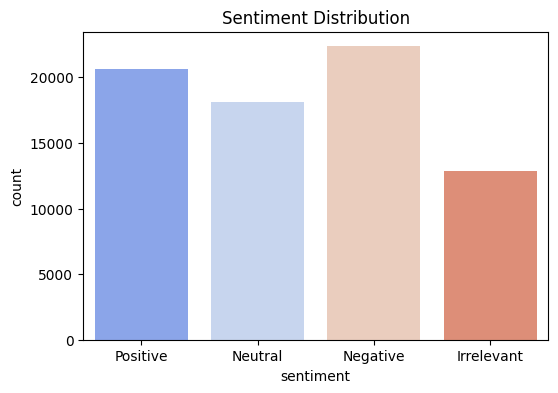

Accuracy Score: 0.6878167443746199

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       0.70      0.54      0.61      2624
    Negative       0.72      0.76      0.74      4463
     Neutral       0.64      0.66      0.65      3589
    Positive       0.69      0.73      0.71      4123

    accuracy                           0.69     14799
   macro avg       0.69      0.67      0.68     14799
weighted avg       0.69      0.69      0.69     14799



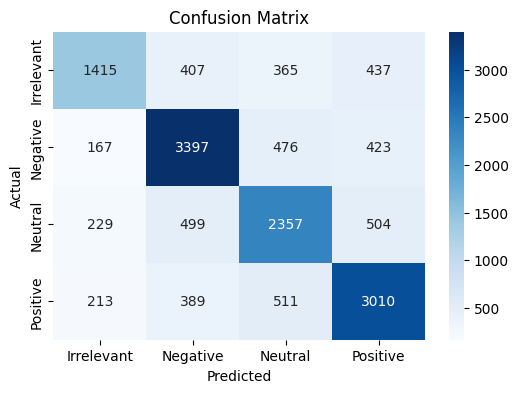

Text: I love this game! It's amazing. => Sentiment: Positive
Text: This is the worst experience I've had. => Sentiment: Negative
Text: Not good, not bad. Just okay. => Sentiment: Negative


In [1]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

# 2. Load and Clean the Dataset
df = pd.read_csv("/content/twitter_training.csv")
df.columns = ['tweet_id', 'topic', 'sentiment', 'text']
df = df.dropna(subset=['text'])
df = df[['text', 'sentiment']]

# 3. Preprocessing Function
def clean_text(text):
    text = text.lower()  # Lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z\s]', '', text)  # Remove punctuation and digits
    text = text.strip()
    tokens = text.split()
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

df['cleaned_text'] = df['text'].apply(clean_text)

# 4. EDA - Distribution of Sentiment
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', palette='coolwarm')
plt.title("Sentiment Distribution")
plt.show()

# 5. TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])
y = df['sentiment']

# 6. Encode Labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 7. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# 8. Model Training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 9. Predictions
y_pred = model.predict(X_test)

# 10. Evaluation
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", xticklabels=le.classes_, yticklabels=le.classes_, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 11. Sample Predictions
sample_texts = [
    "I love this game! It's amazing.",
    "This is the worst experience I've had.",
    "Not good, not bad. Just okay."
]

sample_cleaned = [clean_text(t) for t in sample_texts]
sample_vec = vectorizer.transform(sample_cleaned)
sample_preds = model.predict(sample_vec)
sample_labels = le.inverse_transform(sample_preds)

for txt, label in zip(sample_texts, sample_labels):
    print(f"Text: {txt} => Sentiment: {label}")
